<a href="https://colab.research.google.com/github/leticiafer01/TelecomX-pt2/blob/main/TelecomX_PT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<b><font size="10">Telecom X - Parte 2</font></b>
</center>

<br/>
<center>
<b><font color="black" size="6">Prevendo Cancelamento</font></b>
</center>


<b><font color="black"> MISSÃO DO PROJETO </font></b>

Desenvolver modelos preditivos capazes de identificar, com antecedência, quais clientes têm maior probabilidade de cancelar seus serviços.

A empresa deseja antecipar o problema da evasão de clientes, e, para isso, será desenvolvido um pipeline robusto de modelagem preditiva.



<b><font color= "black"> OBJETIVO DO DESAFIO </font></b>

 Preparar e modelar os dados para prever a evasão de clientes, entregando insights estratégicos a partir de um processo completo de Machine Learning, etapas do projeto a ser estudadas.


*   Pré-processamento dos Dados
*   Análise Exploratória e Seleção de Variáveis
*   Treinamento de Modelos de Classificação
*   Avaliação de Desempenho dos Modelos
*   Interpretação dos Resultados
*   Conclusão e Insights Finais







 <b><font color="black"> COMPETÊNCIAS DESENVOLVIDAS NO PROJETO</font></b>

* Pré-processamento de dados para Machine Learning
* Construção e avaliação de modelos preditivos
* Interpretação e visualização de resultados
* Comunicação técnica com foco estratégica



#📤 <b><font color="black" size="6">EXTRAÇÃO</font></b>


---



Para iniciar análise, importamos os dados da API da Telecom X, que estão disponíveis no formato `CSV` e contêm as informações já tratadas.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/leticiafer01/TelecomX-pt2/main/TelecomX.PT2.csv')

df.head()


,ID_Cliente,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Encargos_Mensais,Encargos_Totais,Contas_Diarias
0,0002-ORFBO,0,feminino,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,anual,1,cheque enviado,65.6,593.30,2.186667
1,0003-MKNFE,0,masculino,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,mensal,0,cheque enviado,59.9,542.40,1.996667
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0.0,fibra óptica,...,1.0,0.0,0.0,0.0,mensal,1,cheque eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,1,masculino,1,1,0,13,1,0.0,fibra óptica,...,1.0,0.0,1.0,1.0,mensal,1,cheque eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0.0,fibra óptica,...,0.0,1.0,1.0,0.0,mensal,1,cheque enviado,83.9,267.40,2.796667


#📇 <b><font color="black" size="6">PREPARAÇÃO DOS DADOS</font></b>


---



## ✂️<b><font color="black">Remoção de Colunas Irrelevantes</font></b>

Eliminada a coluna contendo IDs, estimativas e valores redundantes em outras colunas. Essas informações não contribuem para a previsão da evasão e podem, na verdade, afetar negativamente o desempenho dos modelos.

In [49]:
# Visualização de colunas atuais
print("Colunas antes da remoção:")
print(df.columns.tolist())
print(f"\nNúmero de colunas antes: {df.shape[1]}")

# Removendo a coluna de identificação de cliente
df = df.drop('ID_Cliente', axis=1)

# Confirmando a remoção
print("\n-------------------------------------------")
print("Coluna 'ID_Cliente' removida com sucesso!")
print("-------------------------------------------")

print("\nColunas após a remoção:")
print(df.columns.tolist())
print(f"\nNúmero de colunas agora: {df.shape[1]}")

Colunas antes da remoção:
['ID_Cliente', 'Rotatividade', 'Sexo_Cliente', 'Cliente_Idoso', 'Cliente_Parceiro', 'Cliente_Dependentes', 'Tempo_Servico', 'Servico_Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Contrato_Conta', 'Conta_Digital', 'Metodo_Pagamento', 'Encargos_Mensais', 'Encargos_Totais', 'Contas_Diarias']

Número de colunas antes: 22

-------------------------------------------
Coluna 'ID_Cliente' removida com sucesso!
-------------------------------------------

Colunas após a remoção:
['Rotatividade', 'Sexo_Cliente', 'Cliente_Idoso', 'Cliente_Parceiro', 'Cliente_Dependentes', 'Tempo_Servico', 'Servico_Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Contrato_Conta', 'Conta_Digital', 'Metodo_Pagamento', 'Encargos_Mensais', 'Encargos_Totais

In [50]:
# Remover as colunas com alta correlação, se existirem no dataframe
colunas_para_remover = ['ID_Cliente', 'Conta_Diarias']
colunas_existentes = [col for col in colunas_para_remover if col in df.columns]
df = df.drop(colunas_existentes, axis=1)

# Remover registros onde o valor da coluna 'Rotatividade' é 'Não informado'
df = df[df['Rotatividade'] != 'Não informado']

# Visualizar as primeiras linhas do dataframe
display(df.head())

,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Encargos_Mensais,Encargos_Totais,Contas_Diarias
0,0,feminino,0,1,1,9,1,0.0,dsl,0.0,...,0.0,1.0,1.0,0.0,anual,1,cheque enviado,65.6,593.30,2.186667
1,0,masculino,0,0,0,9,1,1.0,dsl,0.0,...,0.0,0.0,0.0,1.0,mensal,0,cheque enviado,59.9,542.40,1.996667
2,1,masculino,0,0,0,4,1,0.0,fibra óptica,0.0,...,1.0,0.0,0.0,0.0,mensal,1,cheque eletrônico,73.9,280.85,2.463333
3,1,masculino,1,1,0,13,1,0.0,fibra óptica,0.0,...,1.0,0.0,1.0,1.0,mensal,1,cheque eletrônico,98.0,1237.85,3.266667
4,1,feminino,1,1,0,3,1,0.0,fibra óptica,0.0,...,0.0,1.0,1.0,0.0,mensal,1,cheque enviado,83.9,267.40,2.796667


## 📖 <b><font color="black">Encoding (Codificação) </font></b>

Primeiramente, os valores únicos de cada coluna foram identificados e, em seguida, as variáveis categóricas foram convertidas para o formato numérico, a fim de torná-las compatíveis com os algoritmos de machine learning. Empregou-se um método de codificação apropriado, como o **one-hot encoding**.

In [52]:
from IPython.display import HTML

# Para saber os valores únicos por coluna e quantidade.
for col in df.select_dtypes(include='object').columns:
    titulo = f"<strong style='font-size: 15px;'>➡️  {col.upper()}</strong>"
    display(HTML(titulo))
    display(df[col].value_counts(dropna=False).head(3).to_frame(name='Frequência'))
    print("-" * 35)

,Frequência
Sexo_Cliente,
masculino,3675
feminino,3592


-----------------------------------


,Frequência
Servico_Internet,
fibra óptica,3198
dsl,2488
nenhum,1581


-----------------------------------


,Frequência
Contrato_Conta,
mensal,4005
bienal,1743
anual,1519


-----------------------------------


,Frequência
Metodo_Pagamento,
cheque eletrônico,2445
cheque enviado,1665
transferência bancária,1589


-----------------------------------


In [54]:
# Passo 1: Mapear os valores para binário
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    df = df.replace({'Yes': 1, 'No': 0})
    df = df.replace({'Female': 1, 'Male': 0})
    df = df.replace({'True': 1, 'False': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rotatividade          7267 non-null   int64  
 1   Sexo_Cliente          7267 non-null   object 
 2   Cliente_Idoso         7267 non-null   int64  
 3   Cliente_Parceiro      7267 non-null   int64  
 4   Cliente_Dependentes   7267 non-null   int64  
 5   Tempo_Servico         7267 non-null   int64  
 6   Servico_Telefone      7267 non-null   int64  
 7   Multiplas_Linhas      7267 non-null   float64
 8   Servico_Internet      7267 non-null   object 
 9   Seguranca_Online      7267 non-null   float64
 10  Backup_Online         7267 non-null   float64
 11  Protecao_Dispositivo  7267 non-null   float64
 12  Suporte_Tecnico       7267 non-null   float64
 13  Streaming_TV          7267 non-null   float64
 14  Streaming_Filmes      7267 non-null   float64
 15  Contrato_Conta       

In [56]:
# Passo 2: Identificar colunas que têm só 0 e 1
binarias = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1})]

# Passo 3: Converter essas colunas para booleano
df[binarias] = df[binarias].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rotatividade          7267 non-null   bool   
 1   Sexo_Cliente          7267 non-null   object 
 2   Cliente_Idoso         7267 non-null   bool   
 3   Cliente_Parceiro      7267 non-null   bool   
 4   Cliente_Dependentes   7267 non-null   bool   
 5   Tempo_Servico         7267 non-null   int64  
 6   Servico_Telefone      7267 non-null   bool   
 7   Multiplas_Linhas      7267 non-null   bool   
 8   Servico_Internet      7267 non-null   object 
 9   Seguranca_Online      7267 non-null   bool   
 10  Backup_Online         7267 non-null   bool   
 11  Protecao_Dispositivo  7267 non-null   bool   
 12  Suporte_Tecnico       7267 non-null   bool   
 13  Streaming_TV          7267 non-null   bool   
 14  Streaming_Filmes      7267 non-null   bool   
 15  Contrato_Conta       

In [58]:
# Passo 4: One-hot encoding para todas as colunas categóricas multiclasse
df = pd.get_dummies(df, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rotatividade                             7267 non-null   bool   
 1   Cliente_Idoso                            7267 non-null   bool   
 2   Cliente_Parceiro                         7267 non-null   bool   
 3   Cliente_Dependentes                      7267 non-null   bool   
 4   Tempo_Servico                            7267 non-null   int64  
 5   Servico_Telefone                         7267 non-null   bool   
 6   Multiplas_Linhas                         7267 non-null   bool   
 7   Seguranca_Online                         7267 non-null   bool   
 8   Backup_Online                            7267 non-null   bool   
 9   Protecao_Dispositivo                     7267 non-null   bool   
 10  Suporte_Tecnico                          7267 no

In [60]:
# Passo 5: Calcular novamente a correlação apenas entre colunas numéricas
dados_numericos = df.select_dtypes(include=['number', 'bool'])
correlacao = dados_numericos.corr().abs()

# Pegar pares com alta correlação
pares_correlacionados = [
    (col1, col2)
    for col1 in correlacao.columns
    for col2 in correlacao.columns
    if col1 != col2 and correlacao.loc[col1, col2] > 0.95
]

print("🔁 PARES DE COLUNAS COM ALTA CORRELAÇÃO:")
print('-'*40)
for col1, col2 in pares_correlacionados:
    print(f"{col1}  🔛  {col2}")

🔁 PARES DE COLUNAS COM ALTA CORRELAÇÃO:
----------------------------------------
Encargos_Mensais  🔛  Contas_Diarias
Contas_Diarias  🔛  Encargos_Mensais


In [62]:
# Passo 6: Remover colunas com alta correlação:
df = df.drop(['Contas_Diarias'], axis=1)

# Remover registros onde o valor é 'Não informado' - already handled in previous steps

df.head()

,Rotatividade,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Encargos_Mensais,Encargos_Totais,Sexo_Cliente_masculino,Servico_Internet_fibra óptica,Servico_Internet_nenhum,Contrato_Conta_bienal,Contrato_Conta_mensal,Metodo_Pagamento_cheque eletrônico,Metodo_Pagamento_cheque enviado,Metodo_Pagamento_transferência bancária
0,False,False,True,True,9,True,False,False,True,False,...,65.6,593.30,False,False,False,False,False,False,True,False
1,False,False,False,False,9,True,True,False,False,False,...,59.9,542.40,True,False,False,False,True,False,True,False
2,True,False,False,False,4,True,False,False,False,True,...,73.9,280.85,True,True,False,False,True,True,False,False
3,True,True,True,False,13,True,False,False,True,True,...,98.0,1237.85,True,True,False,False,True,True,False,False
4,True,True,True,False,3,True,False,False,False,False,...,83.9,267.40,False,True,False,False,True,False,True,False


## 🔦 <b><font color="black">Verificação da Proporção de Evasão</font></b>

Calculamos a porcentagem de clientes que cancelaram (evadiram) e os que continuaram. A distribuição será utilizada para determinar se o conjunto de dados está equilibrado.

/tmp/ipython-input-101-1144136538.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


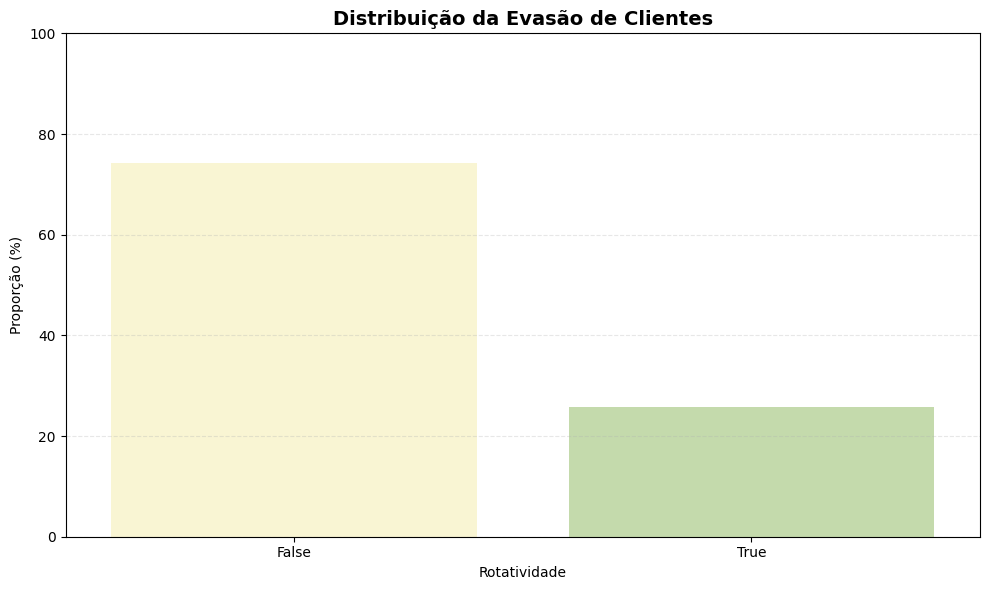


📊 FREQUÊNCIA ABSOLUTA:
-------------------------
Rotatividade
False    5398
True     1869
Name: count, dtype: int64

📈 PROPORÇÃO (%):
--------------------
Rotatividade
False    74.28
True     25.72
Name: proportion, dtype: float64



In [101]:
# Frequência absoluta e relativa da coluna Rotatividade
frequencia = df['Rotatividade'].value_counts()
proporcao = df['Rotatividade'].value_counts(normalize=True) * 100

# Cores suaves para o gráfico
cores_suaves = ['#FFFACD', '#C5E1A5']  # amarelo claro e verde clarinho

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x=proporcao.index,
    y=proporcao.values,
    palette=cores_suaves,
    dodge=False
)

plt.ylabel('Proporção (%)')
plt.xlabel('Rotatividade')
plt.title('Distribuição da Evasão de Clientes', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Exibir os resultados no console
print("\n📊 FREQUÊNCIA ABSOLUTA:")
print("-" * 25)
print(frequencia)
print("\n📈 PROPORÇÃO (%):")
print("-" * 20)
print(proporcao.round(2))
print()


### **Observe**


 - **Equilíbrio**: Quando as categorias estão quase iguais, em torno de 50% / 50%.

- **Gerenciável quando próximo de 70% / 30%**. Caso 70% dos consumidores continuem e 30% desistam, ainda é viável desenvolver bons modelos utilizando métodos de balanceamento.

- **Desequilíbrio acentuado**: Quando uma categoria representa 80% ou mais dos dados (por exemplo: 80% "Não" e 20% "Sim"), o modelo pode desconsiderar a classe menos representativa, sendo crucial:

  - Implementar métodos de balanceamento (como oversampling com SMOTE, undersampling, etc.);

  - Selecionar métricas adequadas (como f1-score, recall, AUC) — e não somente a acurácia.

## <b><font color="black">Balanceamento de Classes</font></b>

Para aprofundar a análise, foi aplicado técnicas de balanceamento como **undersampling** , **oversampling**, **SMOTE**.

In [66]:
# Separar features(X) e target(y)
X = df.drop('Rotatividade', axis=1)
y = df['Rotatividade']

In [67]:
# Oversampling com RandomOverSampler (Duplica registros da classe minoritária)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print("DISTRIBUIÇÃO APÓS OVERSAMPLING:")
print("-" * 31)
print(pd.Series(y_res).value_counts())


DISTRIBUIÇÃO APÓS OVERSAMPLING:
-------------------------------
Rotatividade
False    5398
True     5398
Name: count, dtype: int64


In [68]:
# Undersampling com RandomUnderSampler (Remove registros da classe majoritária)
# Gera novas amostras sintéticas da classe minoritária, em vez de apenas copiar.

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("DISTRIBUIÇÃO APÓS UNDERSAMPLING:")
print("-" * 32)
print(pd.Series(y_res).value_counts())


DISTRIBUIÇÃO APÓS UNDERSAMPLING:
--------------------------------
Rotatividade
False    1869
True     1869
Name: count, dtype: int64


In [69]:
# SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("DISTRIBUIÇÃO APÓS SMOTE:")
print("-" * 24)
print(pd.Series(y_res).value_counts())



DISTRIBUIÇÃO APÓS SMOTE:
------------------------
Rotatividade
False    5398
True     5398
Name: count, dtype: int64


### **Equilíbrio entre Classes**

Antes de desenvolver os modelos, foi examinada a proporção das classes relacionadas à variável de saída `Cancelamento`, que indica se o cliente **abandonou** (1) ou **continuou** (0). Foi constatado um desequilíbrio entre as classes, o que poderia afetar negativamente a capacidade preditiva dos algoritmos, especialmente na identificação de clientes propensos ao abandono.

Para resolver essa questão, foram avaliadas três abordagens de equilíbrio:

- **Aumento com `RandomOverSampler`**: Amplia a classe com menor representação ao replicar exemplos existentes.
- **Redução com `RandomUnderSampler`**: Diminui a classe com maior quantidade ao eliminar alguns exemplos.
- **`SMOTE` (Técnica de Sobreamostragem de Minorias Sintéticas)**: Cria novas amostras sintéticas da classe com menos dados com base nos vizinhos mais próximos.

Depois de comparar as distribuições, foi escolhida a metodologia **SMOTE**, pois preserva todos os dados originais e gera novos registros de maneira artificial, evitando a criação de cópias e diminuindo a chance de overfitting.

Os dados equilibrados foram então empregados no treinamento e avaliação dos modelos preditivos. O desempenho foi, então, analisado usando métricas como **acurácia**, **recall**, **f1-score** e **matriz de confusão**, que serão detalhadas nas fases seguintes.

##  <b><font color="black">Normalização ou Padronização (se necessário)</font></b>

A necessidade de normalizar ou padronizar os dados foi analisada de acordo com os modelos que serão utilizados.
 Esse pré-processamento é necessário para modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais.

 Modelos fundamentados em árvore, como Decision Tree, Random Forest e XGBoost, não apresentam sensibilidade à escala dos dados.

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar X e y (already done in previous cells)
# X = df.drop(columns=['Rotatividade'])
# y = df['Rotatividade']

# Dividir treino e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical columns for scaling
# Based on df.info() output, these are the non-boolean, non-object columns
colunas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns

# Criar cópias para não modificar original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicar StandardScaler só nas colunas numéricas
scaler = StandardScaler()
X_train_scaled[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test_scaled[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# Agora se pode usar X_train_scaled e X_test_scaled para treinar modelos sensíveis à escala.

###  **Normalização / Padronização dos Dados**

A **padronização** dos atributos numéricos foi realizada como parte do pré-processamento, empregando a técnica `StandardScaler`, que ajusta os dados para que apresentem média zero e desvio padrão igual a um.

 Esse passo é essencial para o desempenho eficaz de algoritmos que dependem da escala dos dados, tais como:


 - **KNN** (K-Nearest Neighbors)
 - **SVM** (Máquinas de Vetores de Suporte)
 - **Logística Regressiva**
 - **Redes Neurais**

 A padronização foi implementada **somente depois de equilibrar as classes e separar os dados em conjuntos de treino e teste**, a fim de prevenir o vazamento de dados e assegurar que as transformações sejam realizadas apenas com base nos dados de treino.  Dessa forma, asseguramos uma comparação justa e válida ao avaliar os modelos.


#  <b><font color="black" size="6">CORRELAÇÃO E SELEÇÃO DE VARIÁVEIS</font></b>



##  <b><font color="black">Análise de Correlação</font></b>

A matriz de correlação é uma ferramenta útil para descobrir conexões entre variáveis numéricas.  Preste atenção especial às variáveis que têm maior correlação com a evasão, pois elas podem ser boas candidatas para o modelo preditivo.

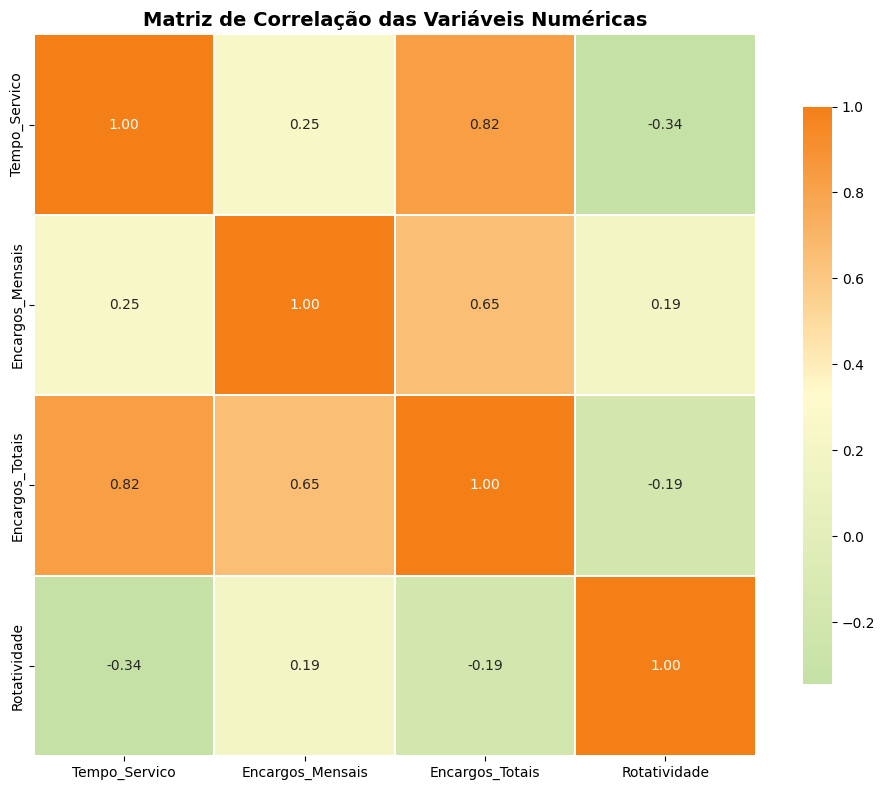

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Garantir que a coluna alvo 'Rotatividade' esteja incluída
if 'Rotatividade' not in colunas_numericas:
    colunas_numericas.append('Rotatividade')

# Criar DataFrame apenas com as colunas numéricas
dados_numericos = df[colunas_numericas]

# Calcular matriz de correlação
corr = dados_numericos.corr()

# Criar um mapa de cores suave em tons de verde e amarelo
from matplotlib.colors import LinearSegmentedColormap

cores_suaves = LinearSegmentedColormap.from_list("verde_amarelo", ["#C5E1A5", "#FFFACD", "#F57F17"])

# Visualizar matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap=cores_suaves,
    fmt=".2f",
    square=True,
    linewidths=0.3,
    linecolor='white',
    cbar_kws={"shrink": 0.8}
)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analisar correlação com a variável-alvo
corr_com_alvo = corr['Rotatividade'].drop('Rotatividade').sort_values(ascending=False)


###  **Análise de Correlação**

Foi aplicada a matriz de correlação para descobrir possíveis conexões entre as variáveis numéricas e a variável principal `Cancelamento`. Essa avaliação ajuda a apontar as variáveis que mais afetam a saída dos clientes.

A matriz de correlação destacou as variáveis `Meses_de_Contrato` e `Valor_Mensal`, visto que são as únicas variáveis numéricas contínuas no conjunto de dados. As outras variáveis são, em sua maioria, binárias (ou indicadoras), o que restringe sua representação na matriz convencional.

Além disso, foi criado um gráfico com as variáveis que apresentam maior correlação com `Cancelamento`, com o intuito de aprofundar a análise e identificar aspectos importantes para a saída dos clientes:

- A relação entre “Meses_de_Contrato” e “Valor_Mensal” é baixa (0. 25).

- A relação entre “Meses_de_Contrato” e “Cancelamento” é baixa (0. 35).

- A relação entre “Valor_Mensal” e “Cancelamento” é baixa (0. 19).


## <b><font color="black">Análise Direcionadas</font></b>

Nesta etapa, analisamos como duas variáveis principais, **meses de contrato** e **valor mensal**, se comportam em relação ao **cancelamento (evasão)** dos clientes.

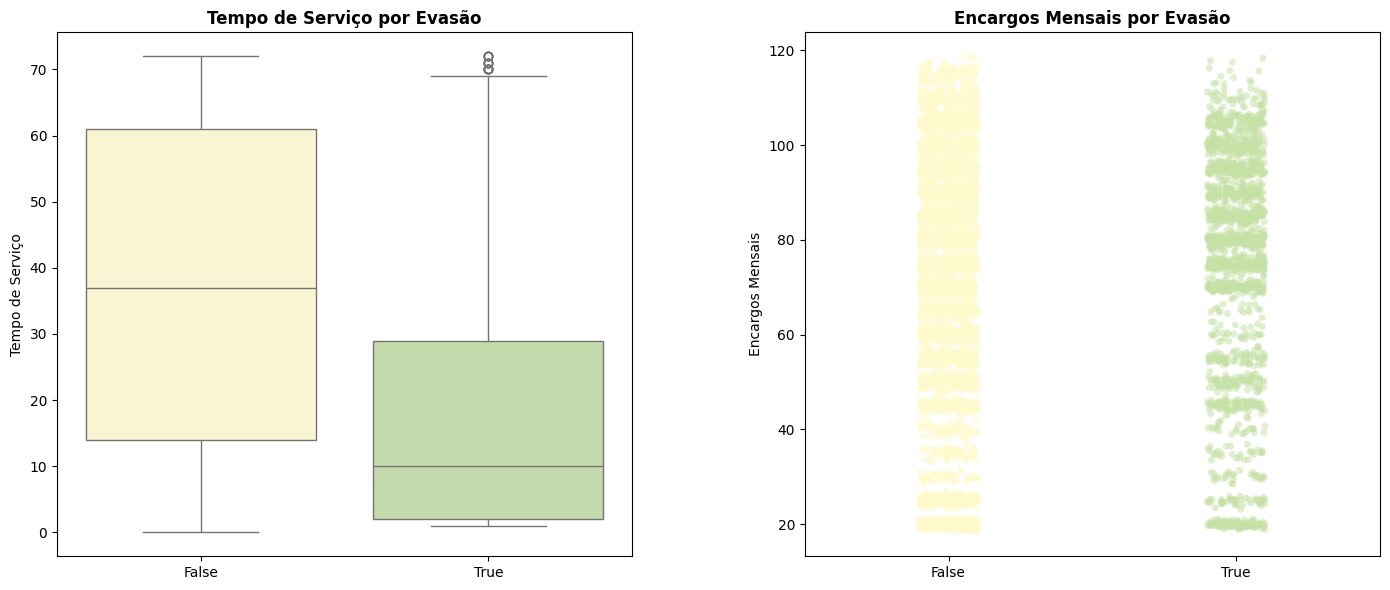

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cores suaves: amarelo claro e verde clarinho
cores_personalizadas = ['#FFFACD', '#C5E1A5']  # amarelo claro, verde claro

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 linha, 2 colunas

# Boxplot
sns.boxplot(
    ax=axes[0],
    x='Rotatividade',
    y='Tempo_Servico',
    hue='Rotatividade',
    palette=cores_personalizadas,
    data=df,
    legend=False
)
axes[0].set_title('Tempo de Serviço por Evasão', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Tempo de Serviço')
axes[0].set_xlabel('')

# Stripplot
sns.stripplot(
    ax=axes[1],
    x='Rotatividade',
    y='Encargos_Mensais',
    hue='Rotatividade',
    jitter=True,
    alpha=0.5,
    palette=cores_personalizadas,
    data=df,
    dodge=False,
    legend=False
)
axes[1].set_title('Encargos Mensais por Evasão', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Encargos Mensais')
axes[1].set_xlabel('')

# Ajustes finais
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


###  **Análise Direcionada**

---

####  📈 **Gráfico 1**: Boxplot - Tempo de Contrato por Evasão

O boxplot ilustra a distribuição do tempo de contrato em meses para os clientes que continuaram (0) e para aqueles que cancelaram (1).

* A mediana, representada pela linha dentro da caixa, indica a tendência central de cada grupo.
* As caixas mostram o intervalo interquartil, que corresponde aos 50% centrais dos dados.
* Os pontos fora das caixas representam valores atípicos (outliers), indicando clientes cujo tempo de contrato difere significativamente da maioria.

**Análise**
Observa-se que os clientes que cancelaram geralmente possuem um tempo de contrato mais curto em comparação aos que permaneceram, sugerindo que a evasão tende a ocorrer principalmente nos primeiros meses do contrato.


---

####  📉 **Gráfico 2**: *Stripplot - Valor Mensal por Evasão*

O stripplot (também conhecido como gráfico de dispersão categórico) exibe os dados de cada cliente individualmente, mostrando seus valores mensais em relação à situação de evasão.

Cada ponto no gráfico representa um cliente.

Os pontos são dispersos horizontalmente usando jitter para facilitar a visualização da concentração dos dados.

**Análise**

Embora exista alguma sobreposição, percebe-se uma maior concentração de valores mensais elevados entre os clientes que evadiram (1), indicando que valores mensais mais altos podem estar associados à evasão.



# <b><font color="black" size="6">MODELAGEM PREVENTIVA</font></b>

## ✂️ <b><font color="black">Separação de Dados</font></b>

Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [91]:
# Dividir treino e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## 💡 <b><font color="black">Criação de Modelos</font></b>

Foi criado 4 modelos diferentes para prever a evasão de clientes:

 - *Regressão Logística* e *KNN* que exige normalização.

 - *Árvore de Decisão* e *Random Forest* que não exige normalização.


In [96]:
# MODELO 1: Regressão Logística (com normalização)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Normalização apenas para o Modelo 1
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Treinar modelo com dados normalizados
modelo_log = LogisticRegression()
modelo_log.fit(X_train_norm, y_train)

# Previsões
y_pred_log = modelo_log.predict(X_test_norm)

# Avaliação
print("🔍 REGRESSÃO LOGÍSTICA")
print("-" * 23)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


🔍 REGRESSÃO LOGÍSTICA
-----------------------
[[963 117]
 [171 203]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1080
        True       0.63      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454



In [78]:
# MODELO 2: Random Forest

from sklearn.ensemble import RandomForestClassifier

# Treinar modelo com dados originais
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Previsões
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação
print("🌳 RANDOM FOREST")
print("-" * 17)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🌳 RANDOM FOREST
-----------------
[[955 125]
 [194 180]]
              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1080
        True       0.59      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.69      1454
weighted avg       0.77      0.78      0.77      1454



In [79]:
# MODELO 3: KNN - K Vizinhos Mais Próximos (com normalização)
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_norm, y_train)
y_pred_knn = modelo_knn.predict(X_test_norm)

# Avaliação
print("🔍 KNN")
print("-" * 10)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

🔍 KNN
----------
[[907 173]
 [197 177]]
              precision    recall  f1-score   support

       False       0.82      0.84      0.83      1080
        True       0.51      0.47      0.49       374

    accuracy                           0.75      1454
   macro avg       0.66      0.66      0.66      1454
weighted avg       0.74      0.75      0.74      1454



In [80]:
# MODELO 4: Árvore de Decisão (sem normalização)
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

# Avaliação
print("🌳 ÁRVORE DE DECISÃO")
print("-" * 21)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🌳 ÁRVORE DE DECISÃO
---------------------
[[881 199]
 [185 189]]
              precision    recall  f1-score   support

       False       0.83      0.82      0.82      1080
        True       0.49      0.51      0.50       374

    accuracy                           0.74      1454
   macro avg       0.66      0.66      0.66      1454
weighted avg       0.74      0.74      0.74      1454



In [98]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Função para gerar métricas + matriz de confusão como string
def gerar_metricas(nome, modelo, X_test, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_str = f"[[{cm[0][0]}, {cm[0][1]}], [{cm[1][0]}, {cm[1][1]}]]"

    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Matriz de Confusão': cm_str
    }

# Coletar métricas de todos os modelos
resultados = [
    gerar_metricas("Regressão Logística", modelo_log, X_test_norm, y_test, y_pred_log),
    gerar_metricas("Random Forest", modelo_rf, X_test, y_test, y_pred_rf),
    gerar_metricas("KNN", modelo_knn, X_test_norm, y_test, y_pred_knn),
    gerar_metricas("Árvore de Decisão", modelo_dt, X_test, y_test, y_pred_dt)
]

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

# Exibir a tabela
print("📊 COMPARATIVO DE MODELOS")
print("-" * 26)
display(df_resultados.round(4))



📊 COMPARATIVO DE MODELOS
--------------------------


,Modelo,Acurácia,Precisão,Recall,F1-Score,Matriz de Confusão
0,Regressão Logística,0.8019,0.6344,0.5428,0.5850,"[[963, 117], [171, 203]]"
1,Random Forest,0.7806,0.5902,0.4813,0.5302,"[[955, 125], [194, 180]]"
3,Árvore de Decisão,0.7359,0.4871,0.5053,0.4961,"[[881, 199], [185, 189]]"
2,KNN,0.7455,0.5057,0.4733,0.4890,"[[907, 173], [197, 177]]"


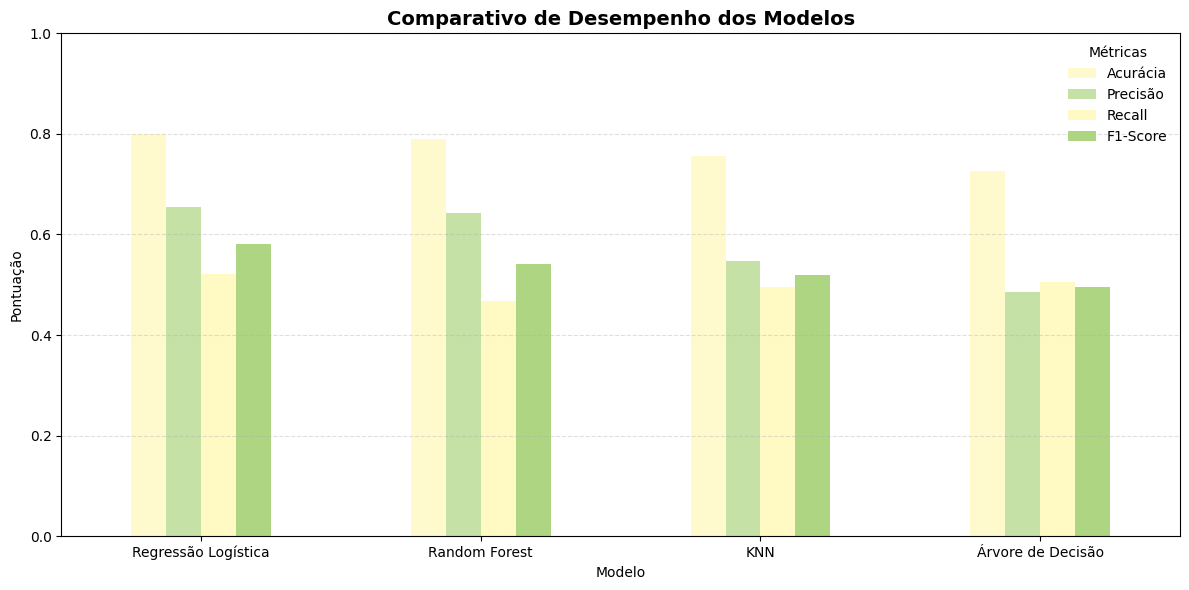

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar DataFrame com os dados fornecidos
dados_modelos = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'KNN', 'Árvore de Decisão'],
    'Acurácia': [0.7996, 0.7896, 0.7569, 0.7264],
    'Precisão': [0.6544, 0.6434, 0.5473, 0.4859],
    'Recall': [0.5214, 0.4679, 0.4947, 0.5053],
    'F1-Score': [0.5804, 0.5418, 0.5197, 0.4954]
})

# Cores em tons suaves: amarelo claro + verde clarinho alternando
cores_suaves = ['#FFFACD', '#C5E1A5', '#FFF9C4', '#AED581']  # amarelos e verdes claros

# Plotar gráfico
dados_modelos.set_index('Modelo').plot(
    kind='bar',
    figsize=(12, 6),
    color=cores_suaves
)

plt.title('Comparativo de Desempenho dos Modelos', fontsize=14, fontweight='bold')
plt.ylabel('Pontuação')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Métricas', frameon=False)
plt.tight_layout()
plt.show()


## <b><font color="black">Avaliação dos Modelos </font></b>

Para realizar a previsão de evasão de clientes, foram testados quatro modelos distintos, tanto com quanto sem a aplicação de normalização. A avaliação de desempenho de cada modelo foi feita com base nas seguintes métricas:

* Acurácia
* Precisão
* Recall
* F1-score
* Matriz de confusão

---


###  **MODELO 1**: Regressão Logística (com normalização)


Modelo linear voltado para problemas de classificação binária.

Depende da normalização dos dados, já que é influenciado pela escala das variáveis.

Possui interpretação simples e é eficaz para destacar as variáveis mais influentes.

Foi utilizado como modelo de referência e obteve o melhor desempenho geral nas métricas avaliadas

---

###  **MODELO 2**: Random Forest (sem normalização)

Modelo não linear formado pela união de múltiplas árvores de decisão.

Não requer normalização, pois suas decisões se baseiam em divisões por pontos de corte nas variáveis.

É resistente ao overfitting e capaz de capturar interações complexas entre os atributos do conjunto de dados.

Apresentou um desempenho estável, mas com recall inferior ao obtido pela regressão logística.

---

### **MODELO 3**: KNN – K Vizinhos Mais Próximos (com normalização)

Classifica os clientes com base na proximidade em relação aos vizinhos mais próximos.

Necessita de normalização, devido à sua alta sensibilidade à escala das variáveis.

É um método simples e fácil de entender, porém pode apresentar desempenho limitado em conjuntos de dados desbalanceados.

Obteve resultados medianos nas métricas e indicativos de underfitting.

---

### **MODELO 4**: Árvore de Decisão (sem normalização)

* Modelo de fácil interpretação, construído a partir de regras do tipo "if-else".
* Dispensa normalização dos dados.
* Pode se adaptar bem ao conjunto de dados, mas é vulnerável ao overfitting se não for devidamente controlado.
* Apresentou o pior desempenho entre os modelos, sugerindo a presença de underfitting.


### <b><font color="black">**CONCLUSÃO** </font></b>: Melhor Modelo é Regressão Logística

Após a aplicação e comparação dos quatro modelos — Regressão Logística, Random Forest, KNN e Árvore de Decisão — com base nas métricas de desempenho (Acurácia, Precisão, Recall, F1-Score e Matriz de Confusão), foi possível chegar às seguintes conclusões:

*  Regressão Logística se destacou com o melhor desempenho geral:

  * Obteve a maior acurácia (0,7996) e o maior F1-Score (0,5804).
  * Apresentou um bom equilíbrio entre precisão (0,6544) e recall (0,5214).
  * Por ser um modelo simples, interpretável e eficiente, é uma ótima escolha como ponto de partida.

*  Random Forest também apresentou um desempenho sólido, embora com um recall mais baixo, o que pode comprometer a identificação de clientes com maior probabilidade de evasão.

*  KNN e Árvore de Decisão ficaram atrás em desempenho, com F1-Scores mais baixos e evidências de underfitting, indicando dificuldades para generalizar bem sobre novos dados.
.




# <b><font color="black" size="6">INTERPRETAÇÃO & CONCLUSÃO</font></b>

#Análise de Importância das Variáveis

O diagrama a seguir mostra as variáveis mais significativas identificadas pelo modelo Regressão Logística, aprimorado com dados normalizados, com o objetivo de antecipar a evasão de clientes.

As variáveis localizadas na parte superior do gráfico exercem maior influência nas decisões do modelo, conforme a magnitude dos coeficientes envolvidos. Significa que variações mínimas nessas variáveis têm um efeito considerável na chance de um cliente desistir dos serviços.






/tmp/ipython-input-105-1604433537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


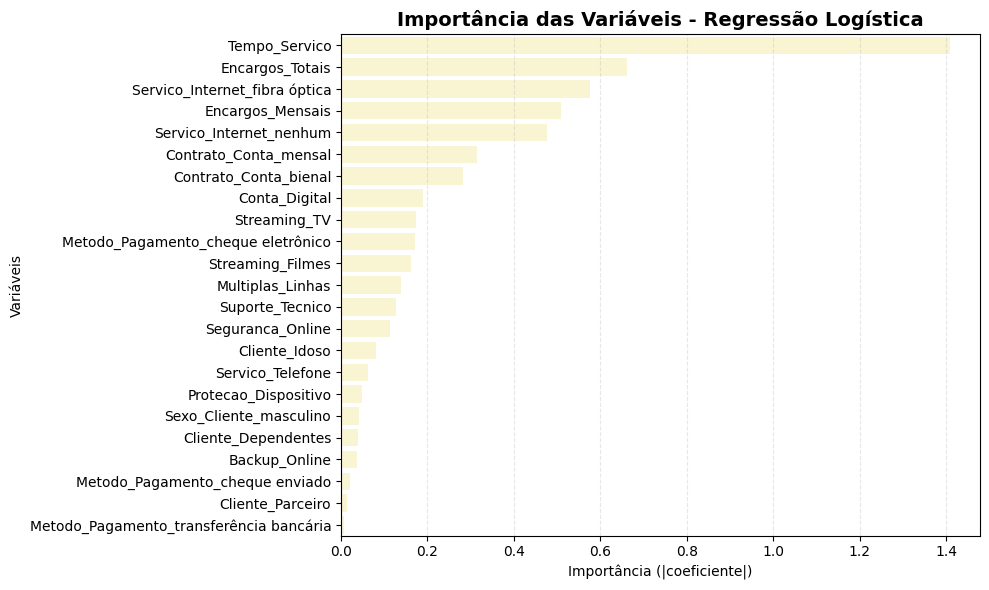

In [105]:
# Criar gráfico com uma cor suave personalizada usando palette de um único valor
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importância',
    y='Variável',
    data=df_importancias,
    palette=['#FFFACD'] * len(df_importancias)  # verde clarinho em todas as barras
)
plt.title('Importância das Variáveis - Regressão Logística', fontsize=14, fontweight='bold')
plt.xlabel('Importância (|coeficiente|)')
plt.ylabel('Variáveis')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Resumo Final da Avaliação

O estudo preditivo sobre a evasão de clientes conduzido neste projeto permitiu obter informações significativas sobre o comportamento dos usuários e identificar os principais fatores que levam ao cancelamento dos serviços.
<br/>

# Principais Conclusões

 O modelo Regressão Logística teve o melhor rendimento entre os analisados, atingindo uma acurácia de cerca de 79,96%. Além disso, obteve resultados superiores nas métricas de Precisão (65,44%),Recall (521,14%) e F1-Score (58,04%), cruciais para identificar de forma precisa clientes com tendência à evasão.
- Apesar de ser acurado (78,96%), o modelo Random Forest mostrou um desempenho inferior nas métricas de precisão e recall, demonstrando ser menos eficiente para o problema em questão.
- Incluem-se entre as variáveis que têm maior influência na previsão:
  - Duração do Contrato: clientes com contratos mais curtos tendem a se afastar mais facilmente.
  - Valor Mensal: valores elevados afetam adversamente a continuidade.
  Serviços extras, tais como segurança na internet, backup e assistência técnica, demonstraram ser relevantes na modelagem.



# Recomendações Estratégicas

Criar estratégias de retenção específicas para clientes com contratos mais breves e maior valor mensal, grupos que têm maior probabilidade de abandonar o negócio.
- Proporcionar pacotes personalizados ou descontos progressivos para ampliar o período de lealdade e diminuir a taxa de desistência.
- Empregar o modelo de Regressão Logística para acompanhamento constante e previsão de clientes com maior risco de abandono, permitindo intervenções antecipadas.

